In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Density Estimators
Consider that you are looking at a birds on a pond, where ducks and geese have flocked. Now, suppose we have to count how many of each bird species is on pond. An intuitive approach would be to, say, keep two piles of stones, one labeled `Duck` and another labeled `Goose`. Each time we observe a duck, we find a nearby stone and add it to the `Duck`-pile, and likewise when we see a goose, we add a pebble to the `Goose` pile.

<img src="jonathon-pinet-lTgZn6UnqRo-unsplash.jpg"/>
<div style="color:gray; font-size:smaller;">(Credit) Photographer: <b>Jonathon Pinet</b>, website: 
    <a href="https://unsplash.com/photos/lTgZn6UnqRo">Usplash</a>
</div>    
 
Let us say that observe a total of 11 ducks and four geese. We can tabulate the data as:

**Duck**: 11
**Goose** : 4
And we can visualize this information as the count-plot using `matplotlib` as:

In [3]:
data = pd.DataFrame(data={'Species':['Duck', 'Goose'], 'Count': [11,4]})
data

,Species,Count
0,Duck,11
1,Goose,4


Recall from the previous notebooks that we can add a splash of style, and good fonts with the plots with some basic configurations.

In [4]:
# For latex-quality, i.e., publication quality legends and labels on graphs.
# Warning: you must have installed LaTeX on your system.
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True) # Enable it selectively 
rc ('font', size=16)

plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize' ] = 13         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72   
plt.rcParams[ 'figure.figsize' ] = '13,8'


Finally, let us draw this out.

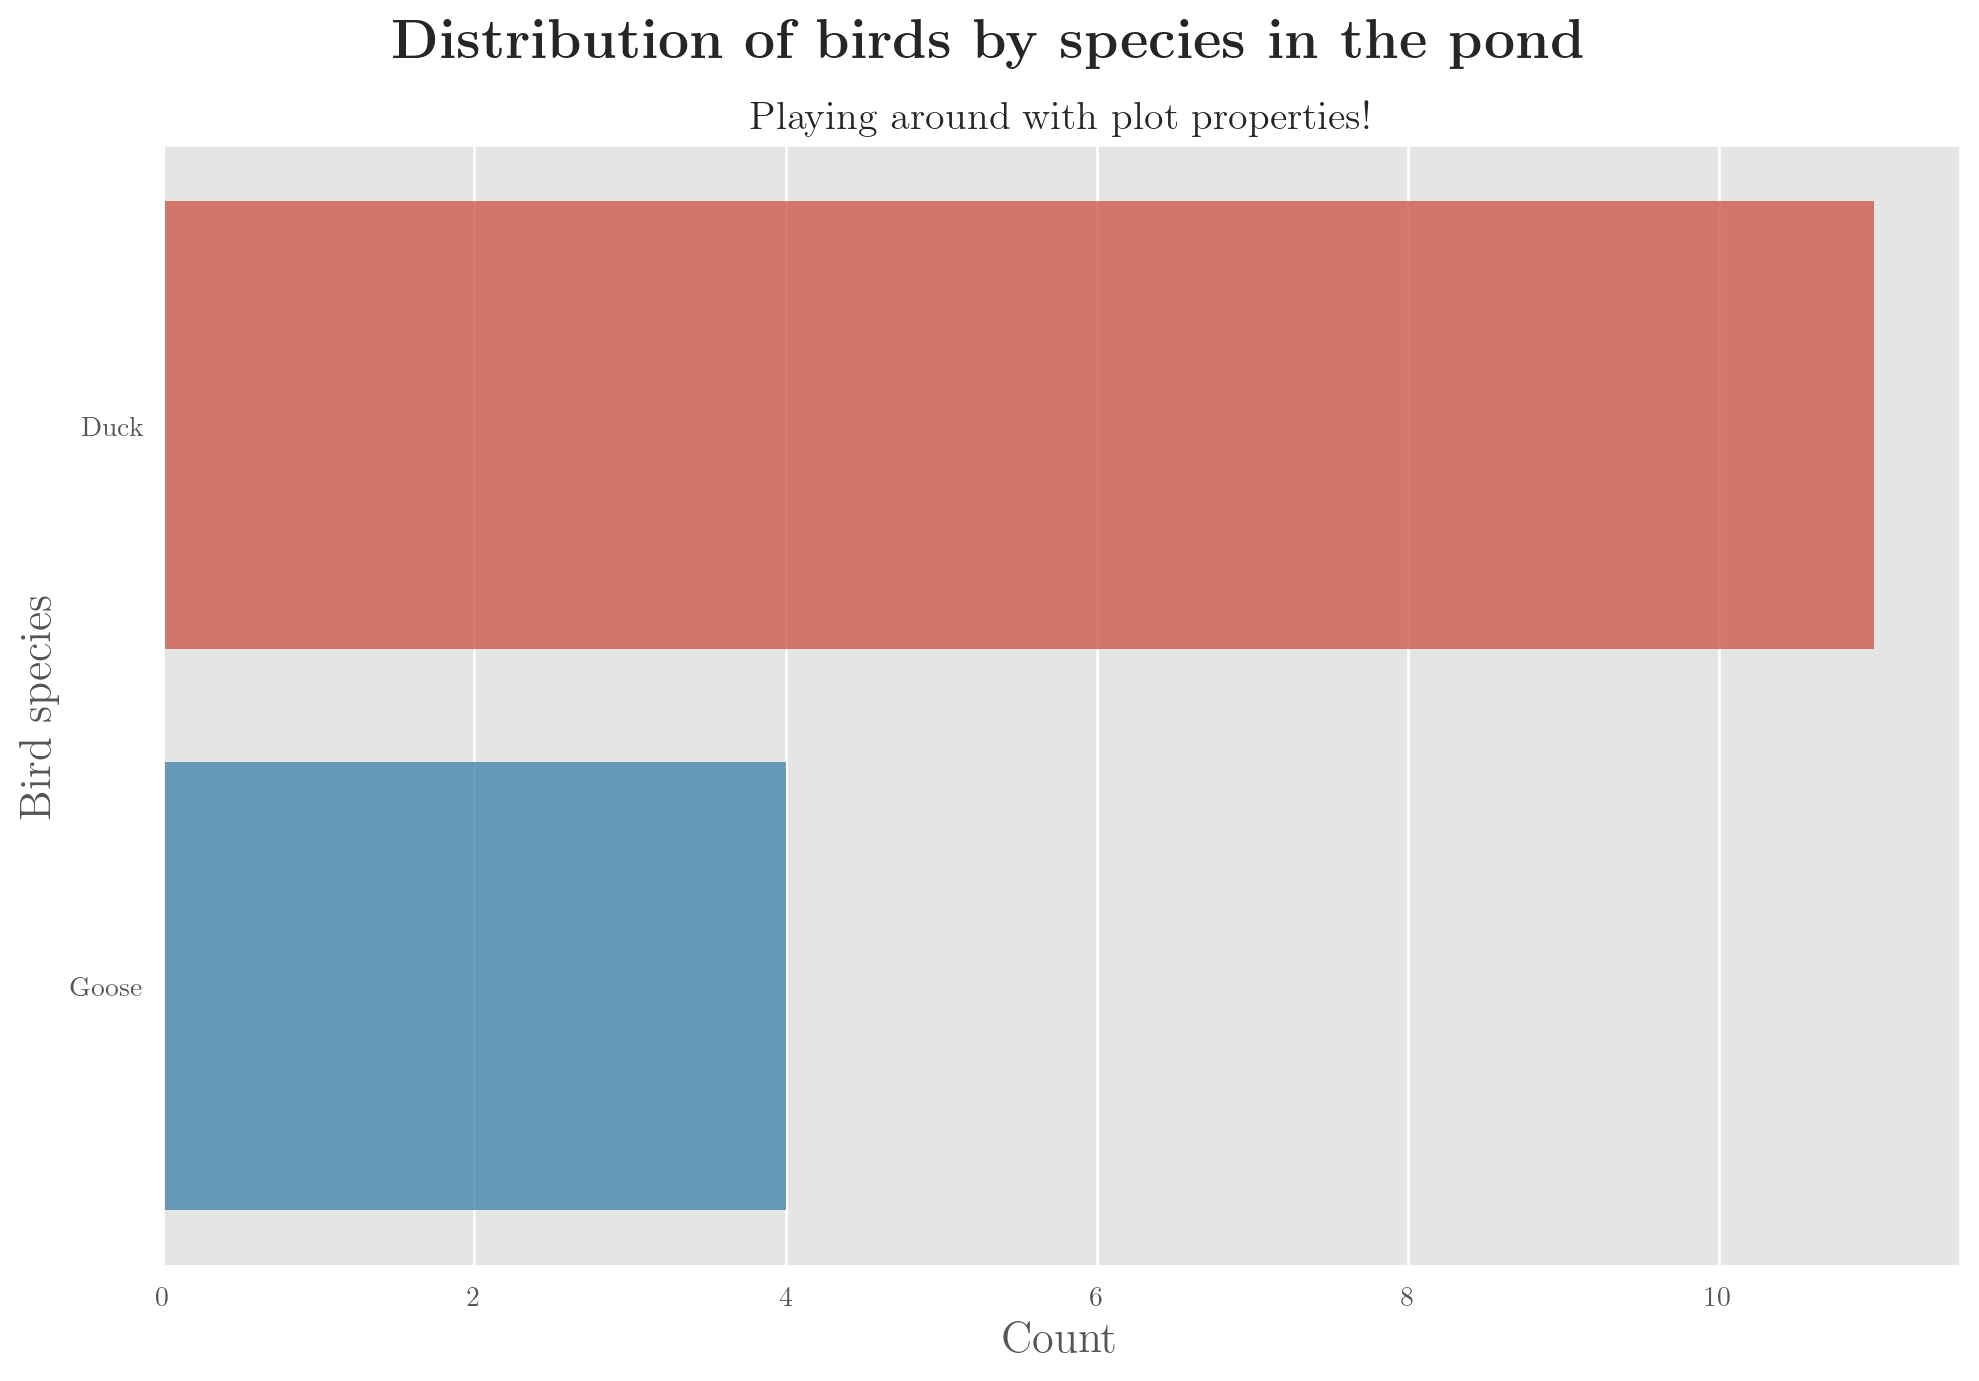

In [18]:
plt.rcParams['figure.dpi'] = 200   
plt.rcParams[ 'figure.figsize' ] = '10,7'
plt.rcParams[ 'axes.labelsize' ] = 16 

# the actual plot code
sns.barplot(data=data,
            x='Count',
            y='Species',
            alpha=0.8)



plt.ylabel(r'Bird species', size=16)
plt.xlabel(r'Count', size=16)
plt.suptitle(r'\textbf{Distribution of birds by species in the pond}', fontsize=20)
plt.title(r'Playing around with plot properties!')
plt.tight_layout()

One may ask: based on this data, what is the probability of a bird being a duck as opposed to a goose? To do that, we can look at the proportion of birds that are ducks. Let us compute and visualize that.

In [5]:
total = data['Count'].sum()
data['Probability'] = data['Count']/total
data

,Species,Count,Probability
0,Duck,11,0.733333
1,Goose,4,0.266667


We can now plot this probability, and the plot would look almost identical, except the x-axis would be probabilities rather than counts.

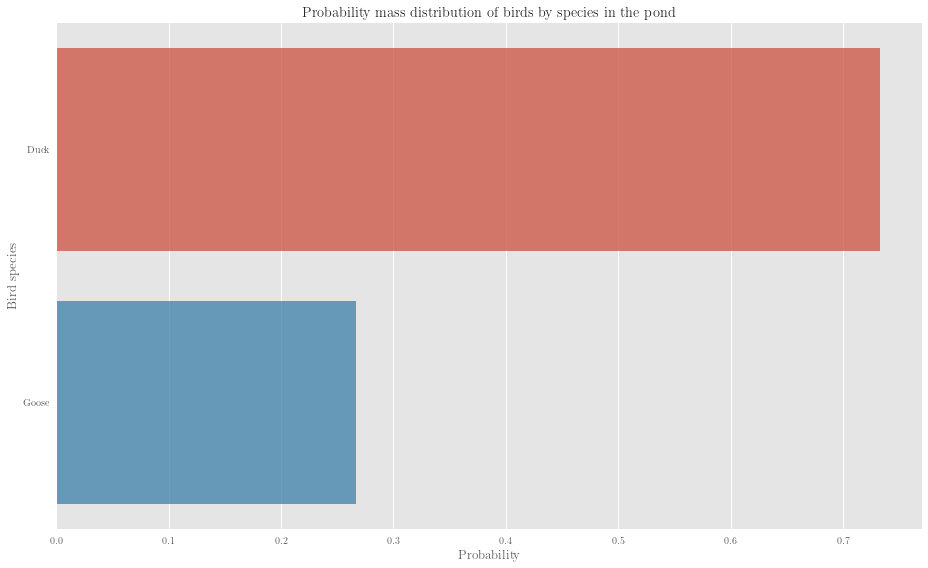

In [6]:
sns.barplot(data=data,
            x='Probability',
            y='Species',
            alpha=0.8)
plt.ylabel(r'Bird species')
plt.xlabel(r'Probability')
plt.title(r'Probability mass distribution of birds by species in the pond')
plt.tight_layout()

# Continuous valued data

Consider now a univariate dataset that is continuous valued:

In [7]:
g1 = np.random.normal(loc=1.0, size=10_000, scale=1.0).reshape(-1,1)
g2 = np.random.normal(loc=4.0, size=7_000, scale=0.5).reshape(-1,1)
data = np.append(g1, g2, axis=0).ravel()

## Density distrubution 

It would be informative to get a sense of how the data is distributed, i.e. at which values is the data more concentrated or likelier than at others?

### Normalized histogram

One of the earliest -- and perhaps the easiest and most popular -- way of doing this is the so-called `normalized histogram` as a density plot, created by the great statistician Pearson, a student of Galton.

It comprises of the following three steps:

* **DISCRETIZATION** Divide the range of the data into a certain number of bins, say 20. Each bin spans a sub-range of data values, say values between 0 and 0.5, for example

* **BINNING** For each value of the random variable (data), find which bin *contains it* -- i.e. the value falls within the value range of that particular bin

* **COUNTING** finally, count the subtotal within each bin, and divide it by the overall size of the dataset. This will specify what proportion of the data fell within that bin. 

And if we consider the dataset representative, then these proportions can be considered probabilities of the data falling into each of the bins.

Thus the histogram provides a simplified -- but course-grained -- density estimator: in other words, it helps identify regions of high and low data density.


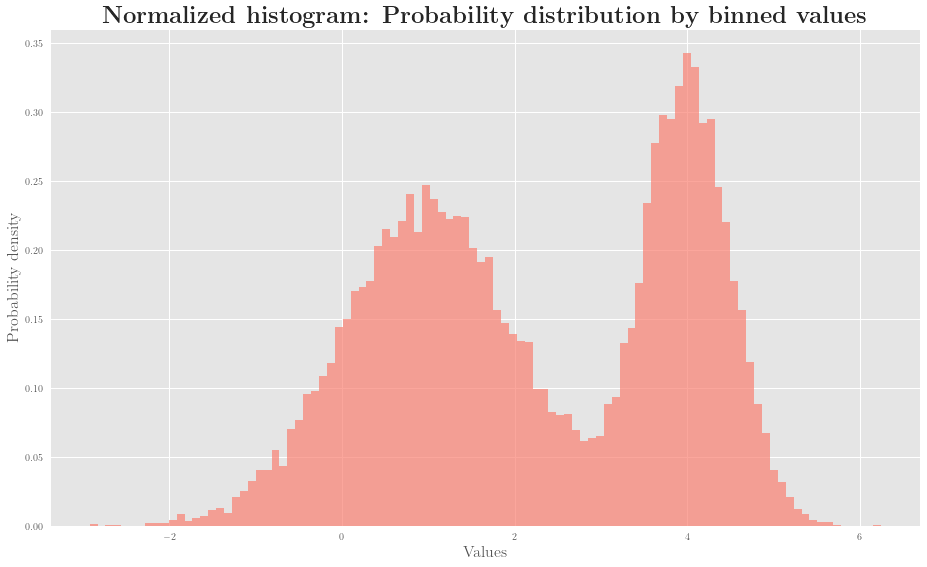

In [8]:
plt.hist(data, 
         bins=100, 
         density=True, 
         alpha=0.7, 
         color='salmon')
plt.xlabel(r'Values', size=16)
plt.ylabel(r'Probability density', size=16)
plt.title(r'\textbf{Normalized histogram: Probability distribution by binned values}', size=24)
plt.tight_layout(pad=1.15)

### Regular histogram vs normalized histogram

**Histogram plots are generally not normalized -- i.e., the y-axis is simply the count of data occurrences within specific bins.** But since we are interested in the histogram as a density estimator, we focused here on the normalized histogram. In `matplotlib`, this is achieved with the parameter-argument `density=True` to the `hist()` function.

Of-course, to get the regular, (unnormalized) histogram, simply remove the `density=True` argument, since by default it is `False`. 

A simple intuition that can help understand the regular histogram is to consider a large collection of boxes. Each box is of unit height, and width the same as the bin-widths. Then for each datum that is encountered, place a box in the bin such that the datum belongs to the bin: i.e. its value is in the bin's range of values. As you iterate through the dataset, the boxes will stack up, and eventually look like the histogram.

The normalized histogram is simply a scaled or normalized version of this box-stacking.

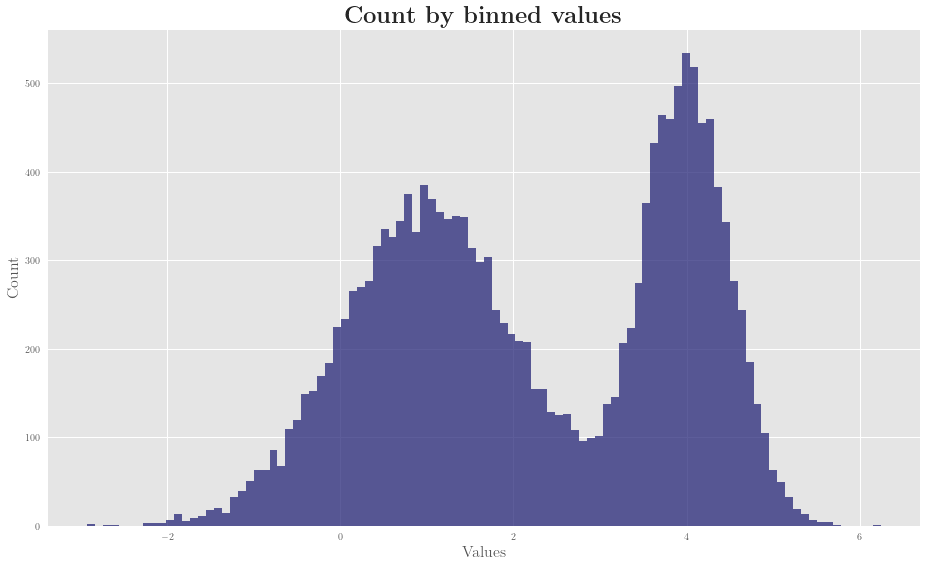

In [9]:
plt.hist(data, 
         bins=100,
         alpha=0.7, 
         color='midnightblue')
plt.xlabel(r'Values', size=16)
plt.ylabel(r'Count', size=16)
plt.title(r'\textbf{Count by binned values}', size=24)
plt.tight_layout(pad=1.15)

### Shape of histogram in response to bins
As one would expect, the shape of the usual or the normalized histograms change with the number of bins. Below, we see the normalized histogram for the default number of bins, and for bins specified as 50 and 500.

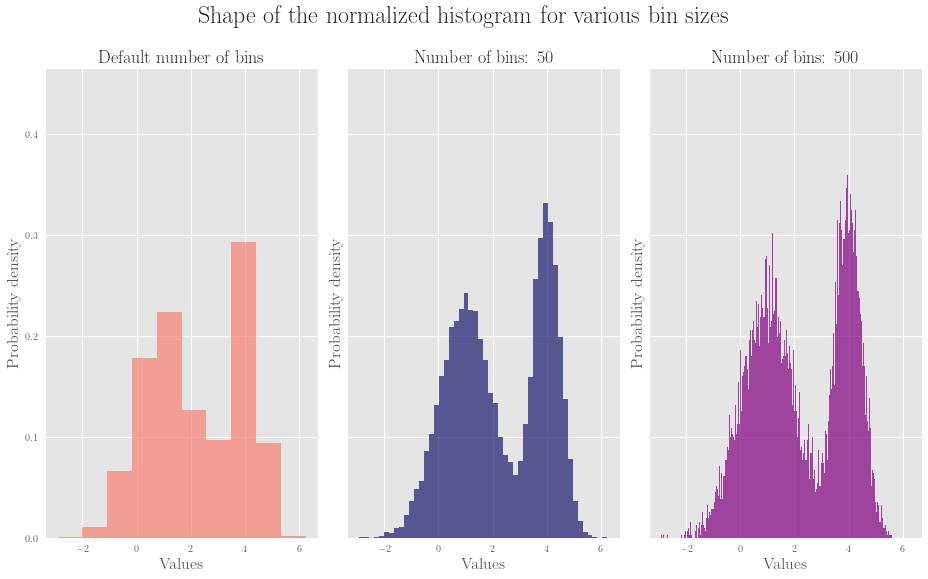

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True )
axes[0].hist(data, 
             alpha=0.7,
             color='salmon', 
             density=True)
axes[0].set_xlabel(r'Values', size=16)
axes[0].set_ylabel(r'Probability density', size=16)
axes[0].set_title(r'Default number of bins', size=18)

axes[1].hist(data, 
             alpha=0.7,
             bins=50,
             color='midnightblue',
            density=True)
axes[1].set_xlabel(r'Values', size=16)
axes[1].set_ylabel(r'Probability density', size=16)
axes[1].set_title(r'Number of bins: 50', size=18)

axes[2].hist(data, 
             alpha=0.7,
             bins=500,
             color='purple', 
            density=True)
axes[2].set_xlabel(r'Values', size=16)
axes[2].set_ylabel(r'Probability density', size=16)
axes[2].set_title(r'Number of bins: 500', size=18)

plt.suptitle(r'Shape of the normalized histogram for various bin sizes', size=24, y=1.)
plt.tight_layout()

From the above figure, one may be tempted to infer that increasing the number of bins to $\infty$ would cause the shape of normalized histogram to asymtotically stabilize. Unfortunately, it doesn't work that way, since data sizes are finite, and so zaggedness and gaps in the plot take over.

The commonsense intuition on looking at the figure would be to seek a continuous differentiable probability density function $p(x)$ such that $\int p(x) \text{d}x $ = 1.

### What does each datum say?

When we encounter a datum, say $x_i$, it is evidence that there is a nonzero probability of finding a value of the random variable that the dataset represents at the value $x_i$. Now, a little reflection will convince us that it need not be exactly at $x_i$, but it says that one is likely to encounter a value in the **neighborhood of $x_i$**.

Thus we can postulate that each data point implies a symmetric probability density function that achieves its maxima at the value $x_i$, but gradually decays as one moves away from the value. We can parameterize how fast it attenuates as one moves away from the value. This parameter is traditionally called **bandwidth** and written as $h$ in the literature, and the function is called a **Kernel density estimator**, usually written as:


\begin{equation}
K(x, x_i; h)
\end{equation}


In other words, given a choice of $h$, we can have a kernel density estimator that decays with distance from the value $x_i$.

Let us define $\delta$ as this scaled distance from the value:

\begin{equation}
\delta(x) = \frac{x - x_i }{h}
\end{equation}

Perhaps the most intuitive -- and the most obiquitous -- kernel is the Gaussian kernel:

\begin{equation}
K(x,x_i; h) = \frac{1}{\sqrt{2\pi} h}\exp(- \frac{\delta(x)^2}{2})
\end{equation}



In [11]:
h = 1.0
xi = 0

x = np.linspace(-5,5, 1000)
δ = (x-xi)/h
normalizer = 1/(h*np.sqrt(2*np.pi))
K = normalizer*np.exp(-(δ**2)/2)

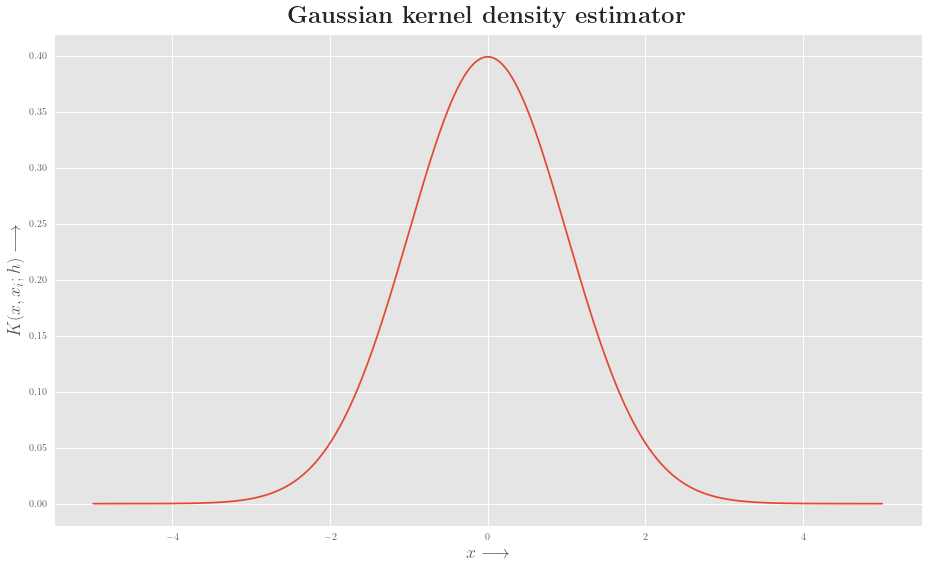

In [12]:
plt.plot(x,K)
plt.xlabel(r'$x\longrightarrow$', size=18)
plt.ylabel(r'$K(x, x_i; h)\longrightarrow$', size=18)
plt.title(r'\textbf{Gaussian kernel density estimator}', size=24, y=1.01)
plt.tight_layout()

There are quite a few kernels that are used. Some of these are:

* exponential kernel
* cosine kernel
* tophat kernel
* epanechnikov

Some other kernels, such as the linear kernel are not of value for our current chain of thought.

Now, consider all the values in the dataset; each contributing a kernel density estimator. Then the net probability estimate at a given point or value $x$ would be the cumulative probabilities from each of the kernels. In other words, it would be:

\begin{equation}
p(x) = \frac{1}{|\mathscr{D}|}\sum_\mathscr{x_i\in D} K(x, x_i; h)
\end{equation}

where $\mathscr{D}$ is the dataset, and $|\mathscr{D}|$ is the cardinality of the dataset.



### Effect of the bandwidth hyper-parameter

A moment of reflection will convince the reader that the bandwidth $h$ will act as a smoothing parameter, controllin g the bias-variance tradeoff. A small value of $h$ would imply stronger attenuation of the kernel function, and so more variance of $p(x)$ -- its shape would show greater undulations. However, a higher value of $h$ would imply slower attenuation, and thus more bias in the value of $p(x)$.

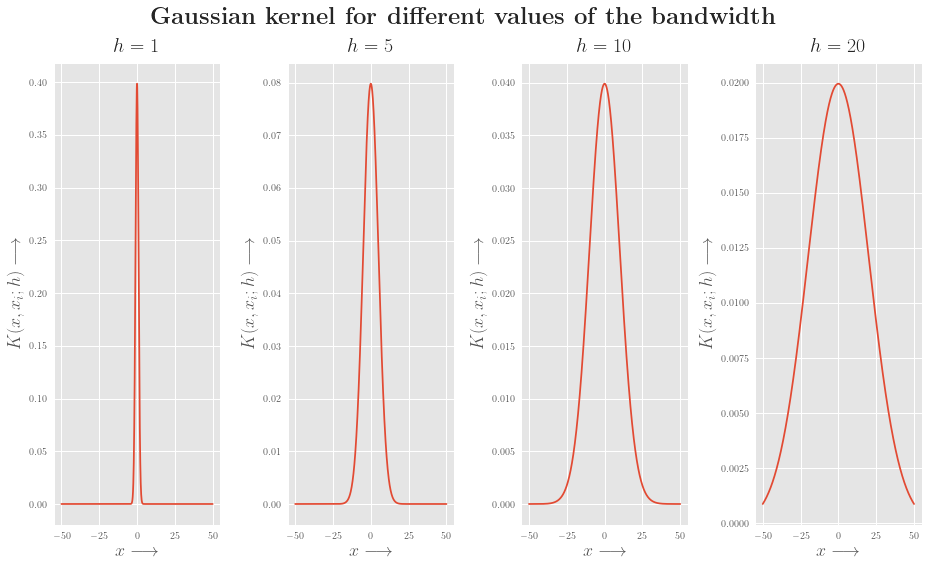

In [13]:

fig, axes = plt.subplots(nrows=1, ncols=4)
xi = 0
x = np.linspace(-50,50, 1000)
for i, h in enumerate([1, 5, 10, 20]):
    δ = (x-xi)/h
    normalizer = 1/(h*np.sqrt(2*np.pi))
    K = normalizer*np.exp(-(δ**2)/2)
    axes[i].plot(x,K)
    axes[i].set_xlabel(r'$x\longrightarrow$', size=18)
    axes[i].set_ylabel(r'$K(x, x_i; h)\longrightarrow$', size=18)
    axes[i].set_title(rf'$h={h}$', size=20, y=1.01)

plt.suptitle(r'\textbf{Gaussian kernel for different values of the bandwidth}', size=24)    
plt.tight_layout()

(The same kernels, in a single plot.)

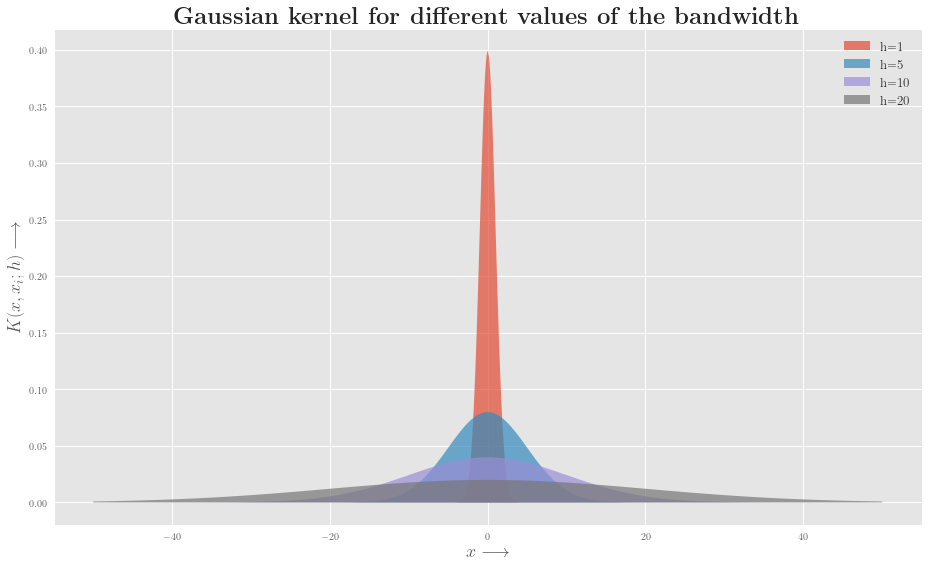

In [14]:
color=['salmon', 'midnightblue', 'purple', 'green']
xi = 0
x = np.linspace(-50,50, 1000)
for i, h in enumerate([1, 5, 10, 20]):
    δ = (x-xi)/h
    normalizer = 1/(h*np.sqrt(2*np.pi))
    K = normalizer*np.exp(-(δ**2)/2)
    plt.fill_between(x,K,  label=f'h={h}', alpha=0.7)
    

plt.xlabel(r'$x\longrightarrow$', size=18)
plt.ylabel(r'$K(x, x_i; h)\longrightarrow$', size=18)
plt.title(r'\textbf{Gaussian kernel for different values of the bandwidth}', size=24)    
plt.legend()
plt.tight_layout()

## Computing the kernels

`scikit-learn` provides support for the kernel density estimators in the `sklearn.neighbors.KernelDensity` estimator. Let us plot the the probability density using a gaussian kernel:


In [15]:
from sklearn.neighbors import KernelDensity
gaussian_kde = KernelDensity(kernel='gaussian', bandwidth=0.25).fit(data.reshape(-1, 1))
samples = np.linspace(-3,7, 10_000).reshape(-1,1)
log_density = gaussian_kde.score_samples(samples)
density = np.exp(log_density)
density.shape

(10000,)

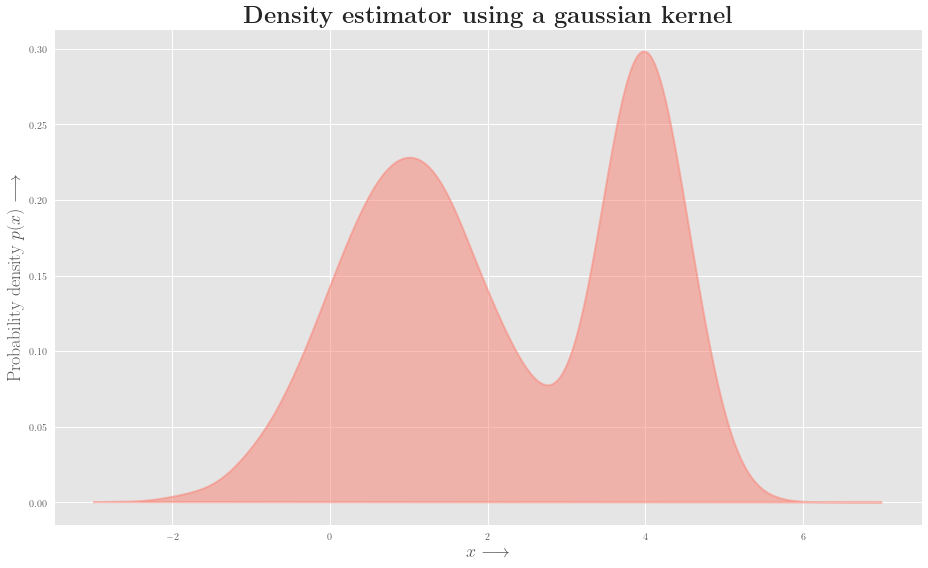

In [16]:
plt.fill( samples, density, color='salmon', alpha=0.5, linewidth=2);
plt.xlabel(r'$x\longrightarrow$', size=18)
plt.ylabel(r'Probability density $p(x)\longrightarrow$', size=18)
plt.title(r'\textbf{Density estimator using a gaussian kernel}', size=24)    
plt.tight_layout()

### The bias-variance tradeoff illustrated

To understand the effect of the bandwidth hyperparameter on kernel density estimator, let us vary the bandwidth and see how the kde responds.

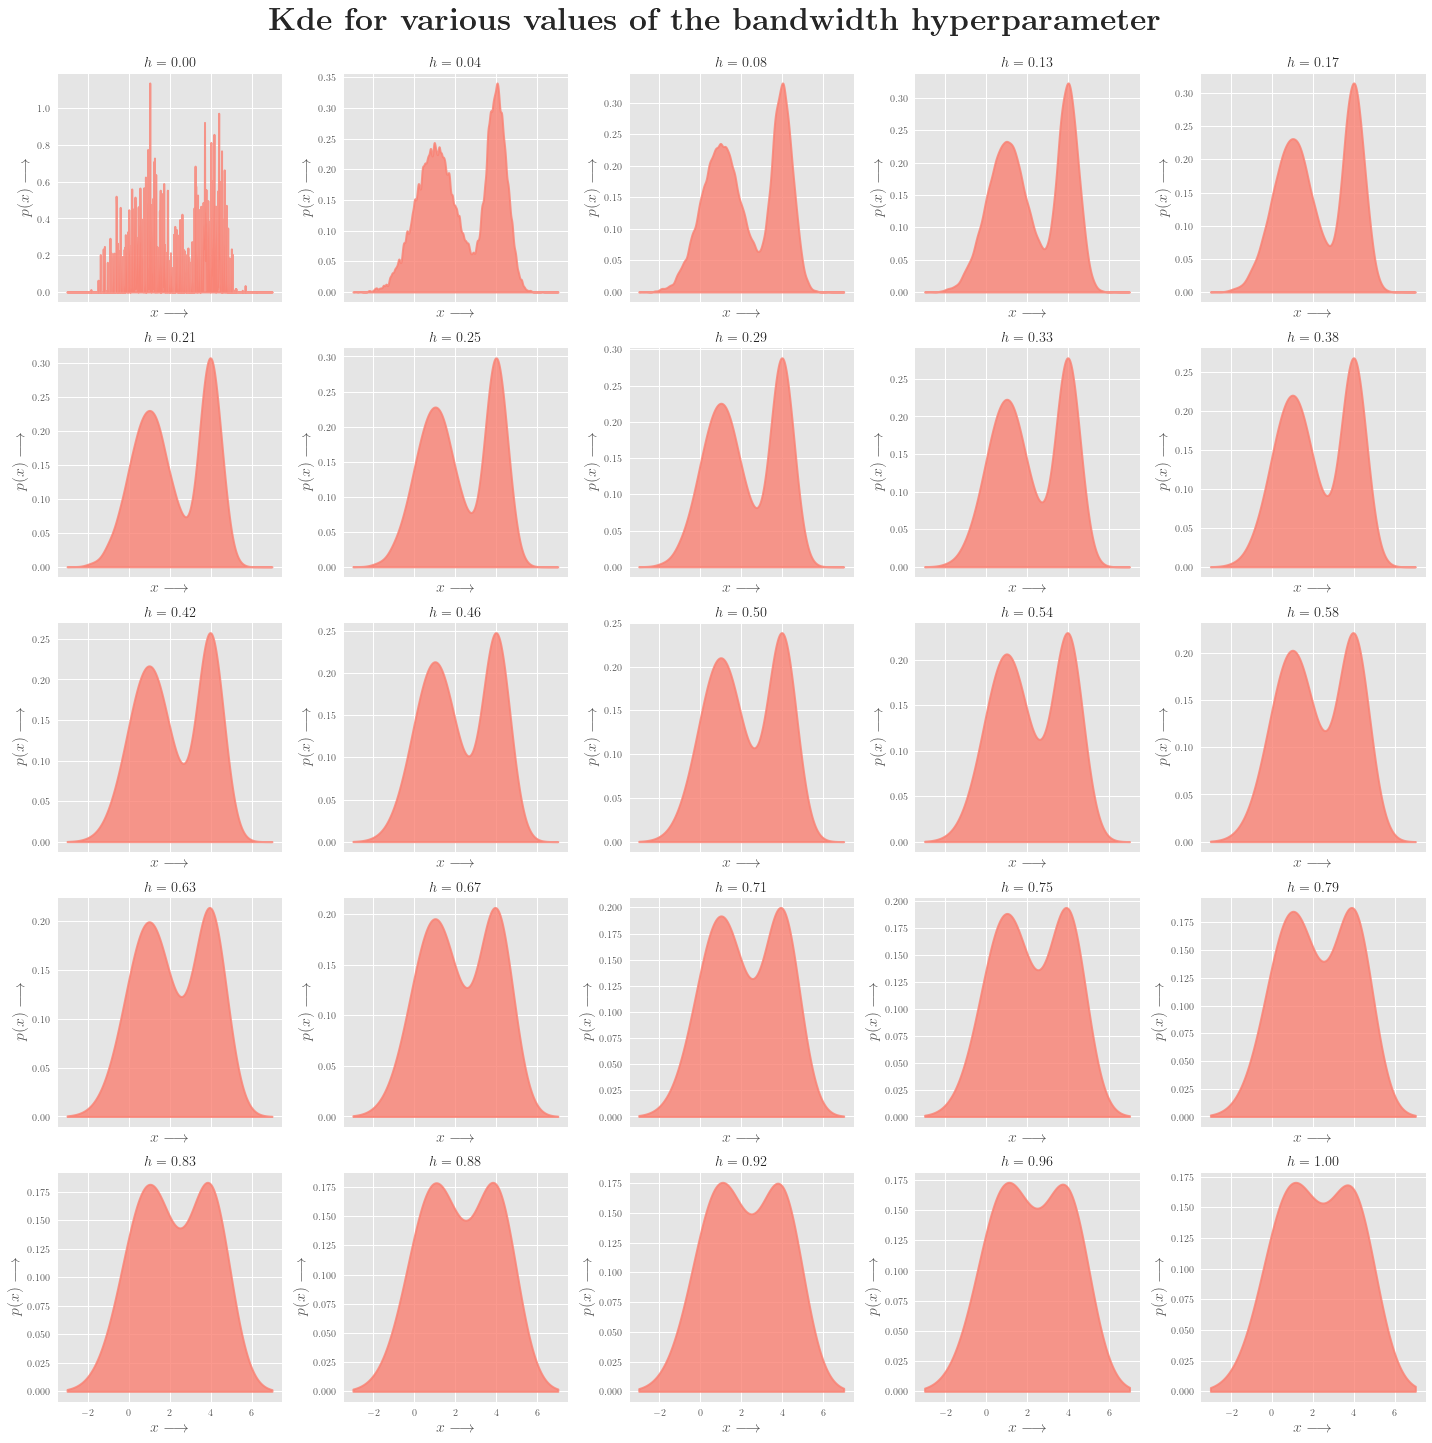

In [17]:
bandwidths= np.linspace(0.0001, 1., 25)
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=False, figsize=(20,20))

for i, bandwidth in enumerate(bandwidths):
    gaussian_kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data.reshape(-1, 1))
    samples = np.linspace(-3,7, 1_000).reshape(-1,1)
    log_density = gaussian_kde.score_samples(samples)
    density = np.exp(log_density)
    
    ax = axes[int(i/5), i%5]
    ax.fill_between( samples.flat, density.flat, color='salmon', alpha=0.8, linewidth=2)
    ax.set_xlabel(r'$x\longrightarrow$', size=16)
    ax.set_ylabel(r'$p(x)\longrightarrow$', size=16)
    ax.set_title(rf'$h={bandwidth:.2f}$')
    
plt.suptitle(r'\textbf{Kde for various values of the bandwidth hyperparameter}', size=32, y=1.)
plt.tight_layout()

Likewise, we can use other kernels.


## Seaborn

For visualizing kernels, `seaborn` provides excellent support. Let us plot the kernel again, now using `seaborn` directly. Below, let's plot first with just the density estimator curve, and next with it filled in.

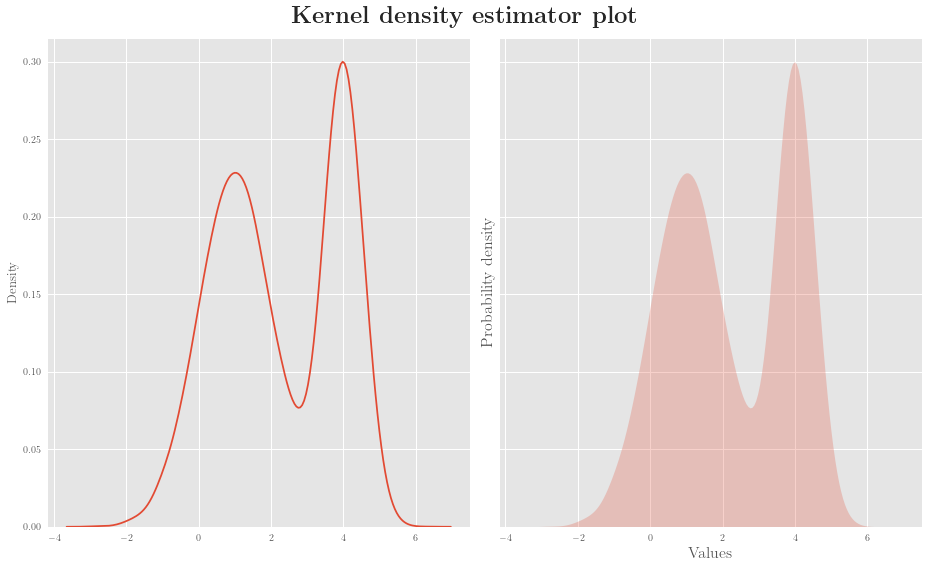

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.kdeplot(data, ax=axes[0])
plt.xlabel(r'Values', size=16)
plt.ylabel(r'Probability density', size=16)


sns.kdeplot(data, ax=axes[1], fill=True, linewidth=0)
plt.xlabel(r'Values', size=16)
plt.ylabel(r'Probability density', size=16)


plt.suptitle(r'\textbf{Kernel density estimator plot}', size=24)
plt.tight_layout()

## Auto dataset

Now that we have become conversant in density estimators for a single variable data, let us now consider more complex datasets. We will look at the density estimators in the context of the `auto` dataset, that we have been using in our previous labs. The discussion below assumes that the reader is familiar with this dataset -- if not, it may be worth pausing and studing the `auto-mpg.ipynb` notebook.

We will start with a very quick exploration of the data statistics, after loading it.

In [19]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/Auto.csv'
data = pd.read_csv(source)
# to remove missing values (see previous labs)
data = data[data.horsepower !='?'].astype({'horsepower':'float', 'origin':'string'})
# to drop the feature that is no analytical value.
data.drop('name', axis=1, inplace=True)

In [20]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,392.0,NaN,NaN,NaN,23.445918,7.805007,9.0,17.0,22.75,29.0,46.6
cylinders,392.0,NaN,NaN,NaN,5.471939,1.705783,3.0,4.0,4.0,8.0,8.0
displacement,392.0,NaN,NaN,NaN,194.41199,104.644004,68.0,105.0,151.0,275.75,455.0
horsepower,392.0,NaN,NaN,NaN,104.469388,38.49116,46.0,75.0,93.5,126.0,230.0
weight,392.0,NaN,NaN,NaN,2977.584184,849.40256,1613.0,2225.25,2803.5,3614.75,5140.0
acceleration,392.0,NaN,NaN,NaN,15.541327,2.758864,8.0,13.775,15.5,17.025,24.8
year,392.0,NaN,NaN,NaN,75.979592,3.683737,70.0,73.0,76.0,79.0,82.0
origin,392,3,1,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The normalized histograms

Let us consider the normalized histograms as the simple density estimators for each of the numerical features:

(Note that we drop `cylinders` and `year` as features since they are ordinal variables.)

In [21]:
numerical_data = data.drop(columns=['cylinders', 'year'])
numerical_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,392.0,NaN,NaN,NaN,23.445918,7.805007,9.0,17.0,22.75,29.0,46.6
displacement,392.0,NaN,NaN,NaN,194.41199,104.644004,68.0,105.0,151.0,275.75,455.0
horsepower,392.0,NaN,NaN,NaN,104.469388,38.49116,46.0,75.0,93.5,126.0,230.0
weight,392.0,NaN,NaN,NaN,2977.584184,849.40256,1613.0,2225.25,2803.5,3614.75,5140.0
acceleration,392.0,NaN,NaN,NaN,15.541327,2.758864,8.0,13.775,15.5,17.025,24.8
origin,392,3,1,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN


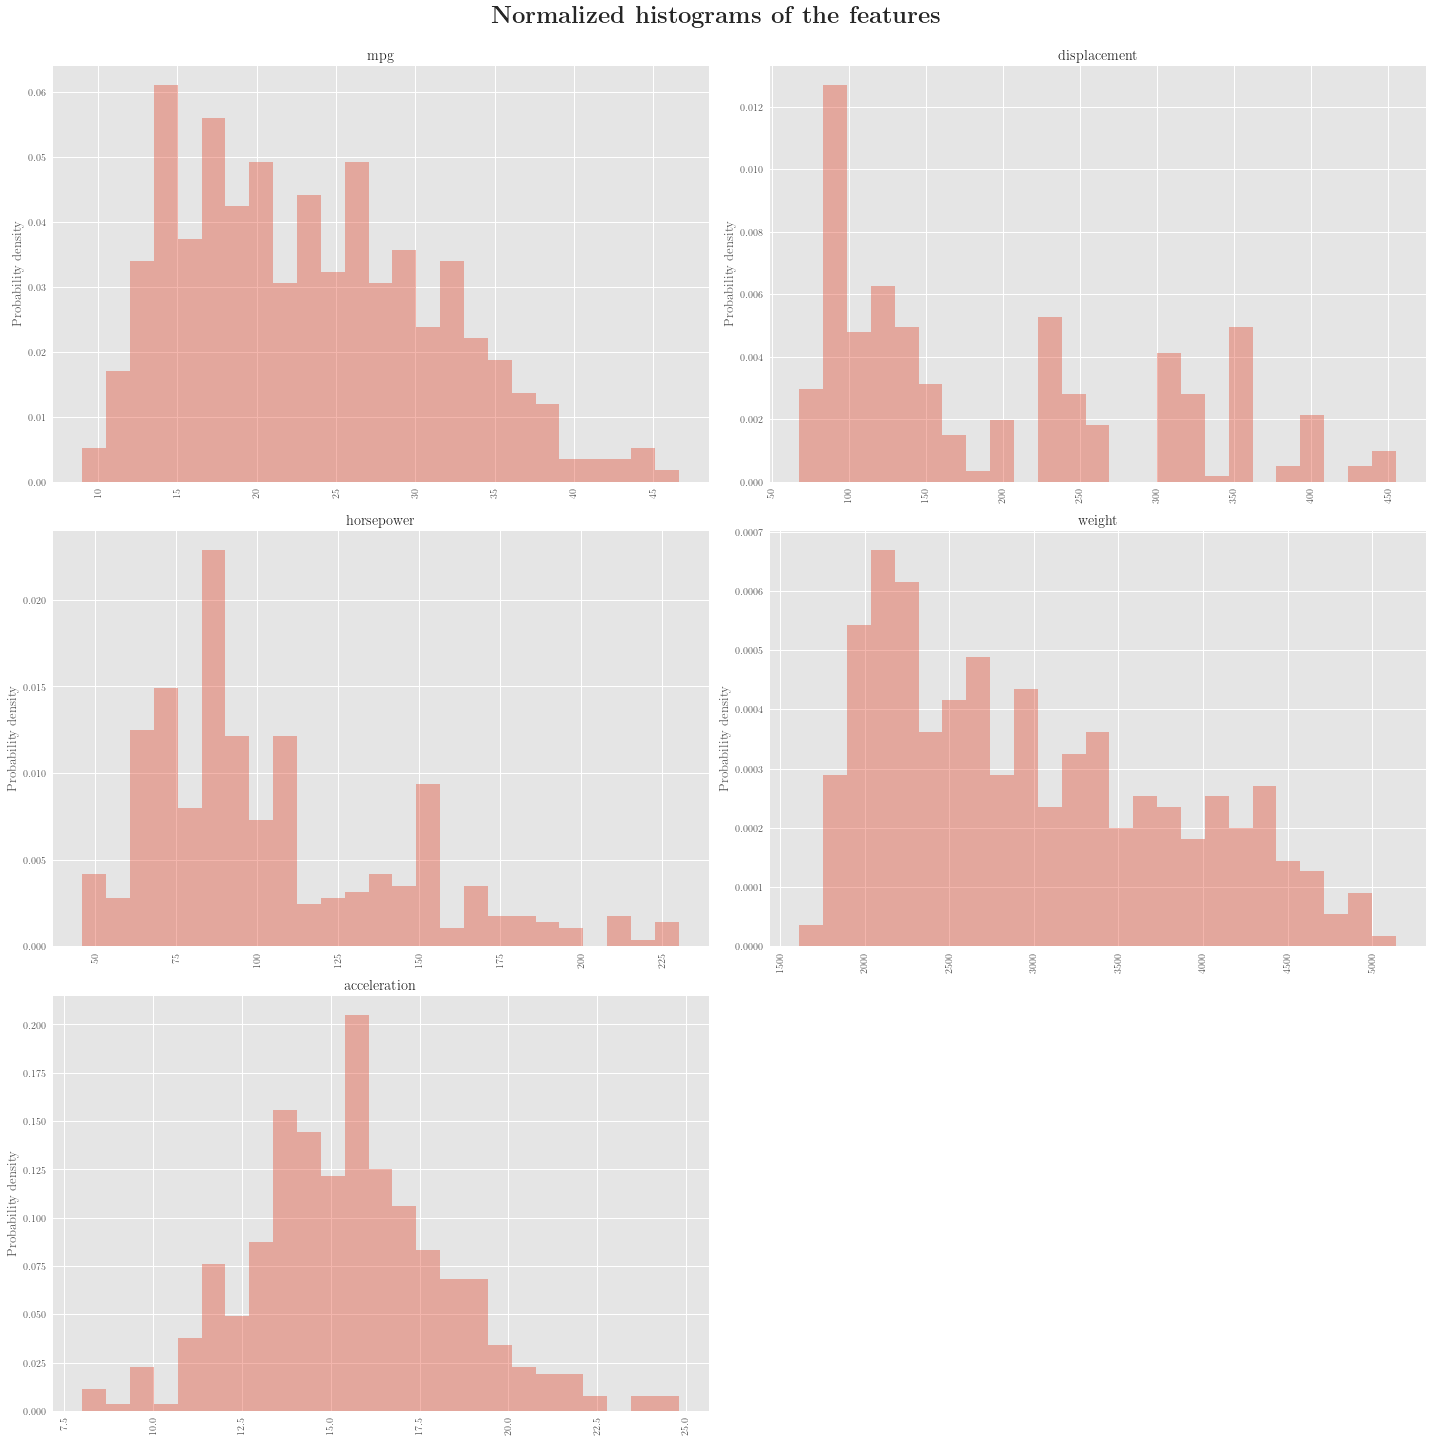

In [22]:
axes = numerical_data.hist(
                           bins=25,  
                           alpha = 0.4, 
                           xrot=90, 
                           figsize=(20,20), 
                           density=True,
                          );
for ax in axes.flatten():
    ax.set_ylabel(r'Probability density')
    
plt.suptitle(r'\textbf{Normalized histograms of the features}', size=24, y=1)
plt.tight_layout()

### 1-D kernel density estimators

Next, let us use `seaborn` to plot out the kernel density estimators for each of the above features.

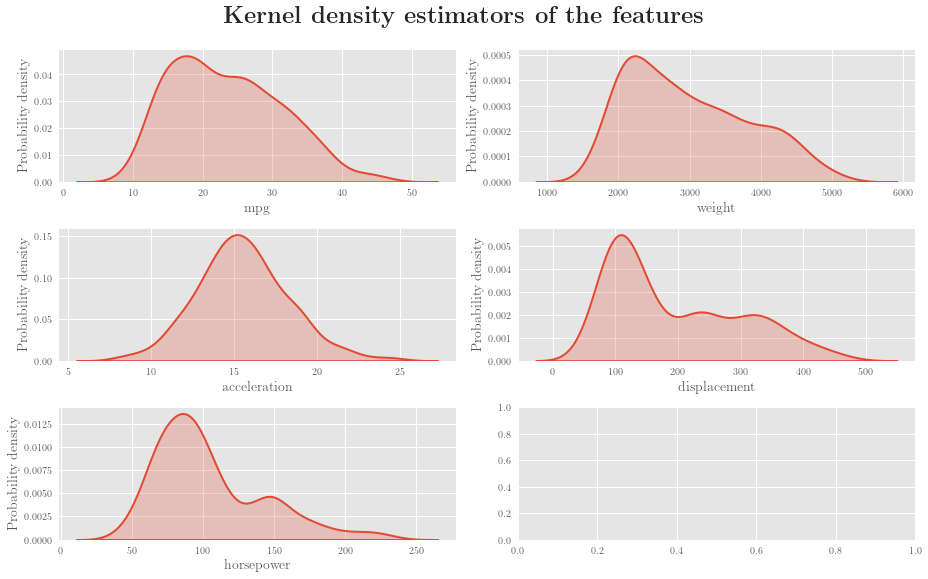

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=False)


for i, feature in enumerate(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']):
        ax = axes[i%3, i%2]
        sns.kdeplot(data = numerical_data, 
                    x=feature, 
                    ax=ax, 
                    fill=True, 
                    linewidth=2, 
                    )
        ax.set_xlabel(rf'{feature}', size=14)
        ax.set_ylabel(r'Probability density', size=14)

plt.suptitle(r'\textbf{Kernel density estimators of the features}', size=24, y=1)
plt.tight_layout()


There is also the ability to group the histograms by a categorical feature. Let's consider the `origin` of the automobile (the geographical region where it is sold):

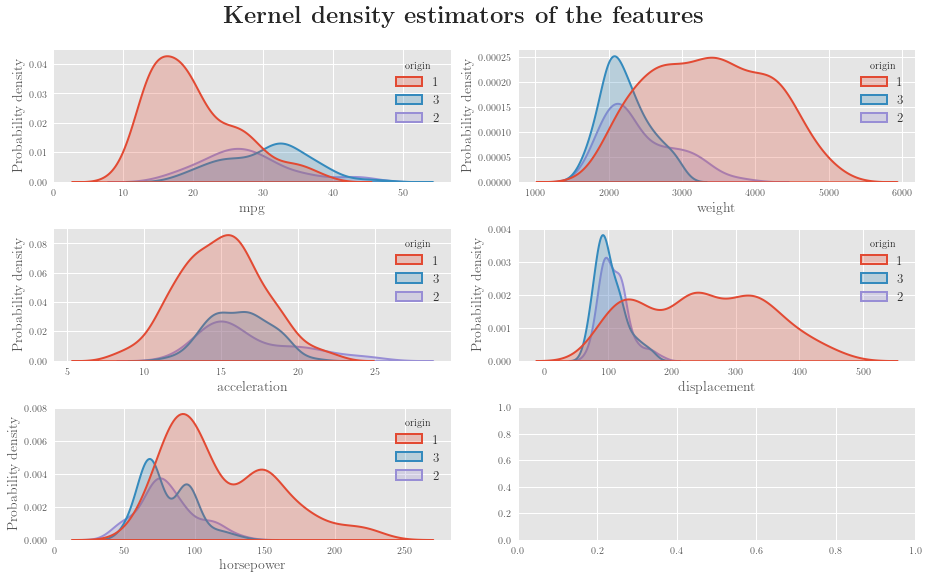

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=False)


for i, feature in enumerate(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']):
        ax = axes[i%3, i%2]
        sns.kdeplot(data = numerical_data, 
                    x=feature, 
                    ax=ax, 
                    fill=True, 
                    linewidth=2, 
                    hue='origin')
        ax.set_xlabel(rf'{feature}', size=14)
        ax.set_ylabel(r'Probability density', size=14)

plt.suptitle(r'\textbf{Kernel density estimators of the features}', size=24, y=1)
plt.tight_layout()


### Multidimensional kernel density estimators

It is straightforward to generalize the concept of density estimators to higher dimensional spaces. For example, if we look at kernel density estimators, given an n-dimensional feature space where a datum is given by: $\mathbf{x}_i \in \mathbb{R}^n$, the kernel function can be generalized to $K(\mathbf{x}, \mathbf{x}_i; h)$, and the probability density estimator is the summation, as before, on the kernel functions of each of the points (data instances).


\begin{equation}
p(\mathbf{x}) = \frac{1}{|\mathscr{D}|}\sum_\mathscr{\mathbf{x}_i\in D} K(\mathbf{x}, \mathbf{x}_i; h)
\end{equation}

where $\mathscr{D}$ is the dataset, and $|\mathscr{D}|$ is the cardinality of the dataset.

Let us consider the 2-dimensional kernel density estimators, since they are easier to visualize.

### 2-D kernel density estimators

Consider, for example, the two features `mpg` and `horsepower`, and see the kernel density estimator for this feature subspace.

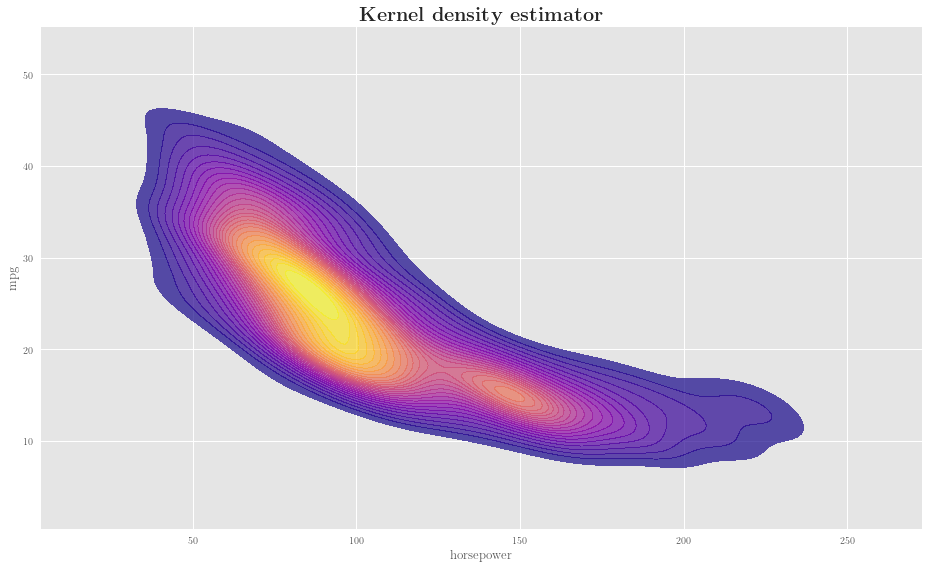

In [25]:
sns.kdeplot(data=data, 
            x="horsepower", 
            y="mpg", 
            fill=True,     # will color the data space
            cmap='plasma', # selecting a color map that brings out the contrast between dense and sparse regions
            levels=30,     # the number of levels to discretize the colors to
            alpha=0.7,
           )
plt.title(r'\textbf{Kernel density estimator}', size=20)
plt.tight_layout()


#### Showing the contour-lines

It is sometimes useful to show only the contour curves:

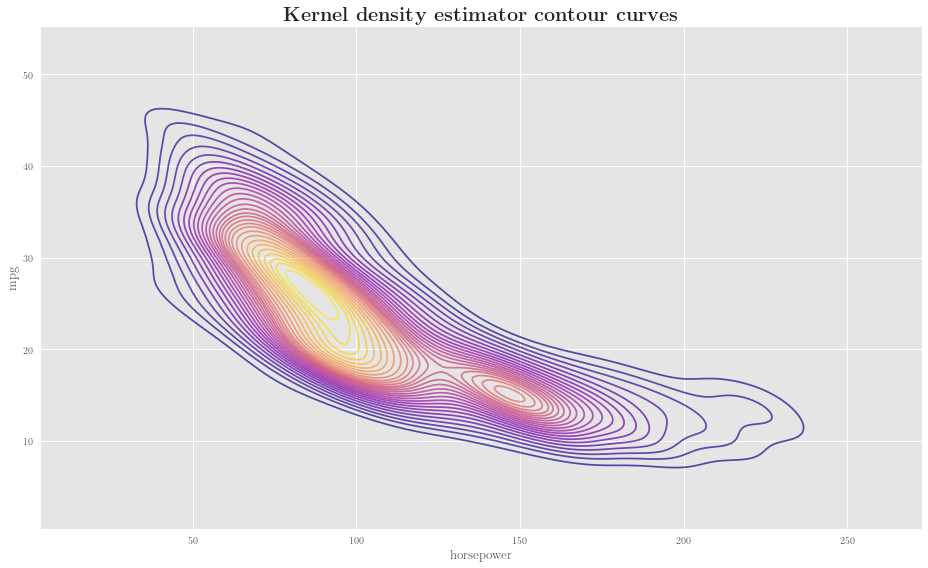

In [26]:
sns.kdeplot(data=data, 
            x="horsepower", 
            y="mpg", 
            fill=False,     # suppress the coloring
            cmap='plasma', # selecting a color map that brings out the contrast between dense and sparse regions
            levels=30,     # the number of levels to discretize the colors to
            alpha=0.7
           )
plt.title(r'\textbf{Kernel density estimator contour curves}', size=20)
plt.tight_layout()


## Pair-plots

It is possible to bring all these density estimators in one place for all the features. The below code illustrates that:


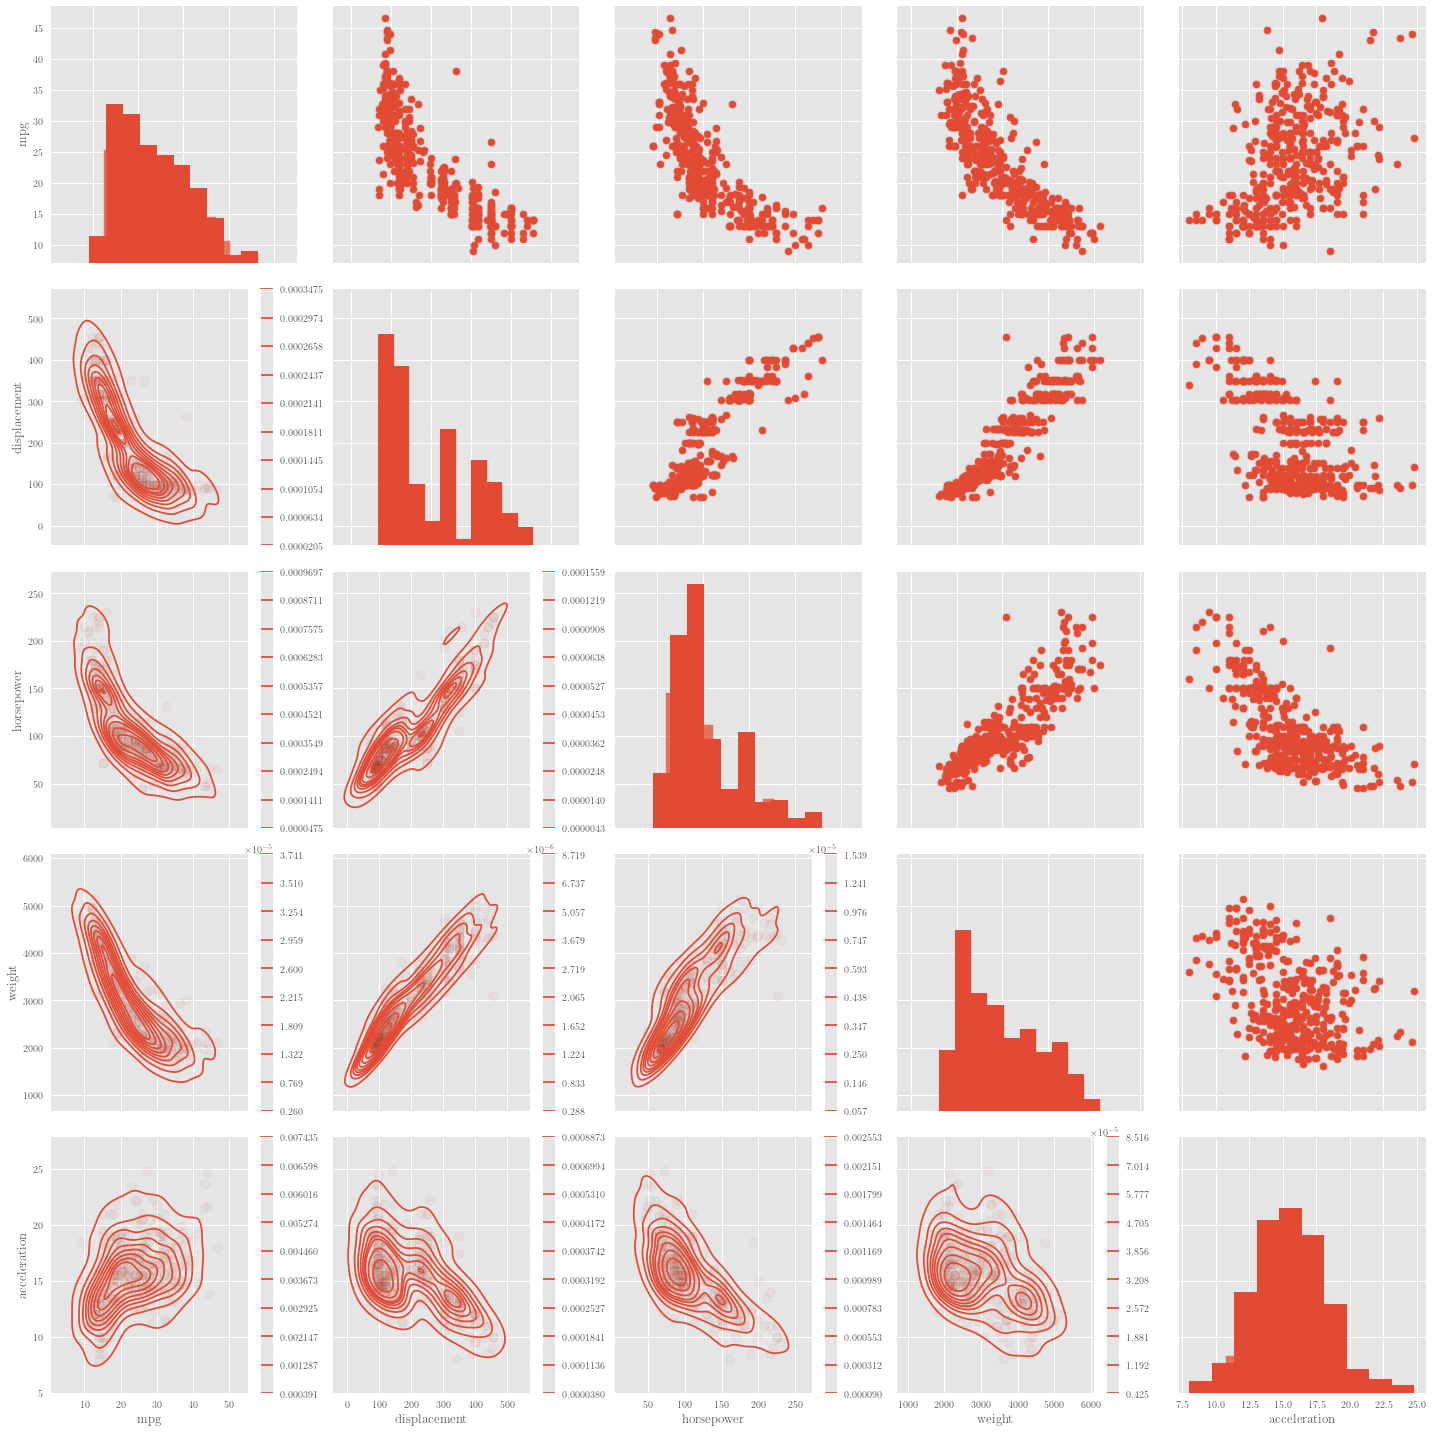

In [27]:
sns.color_palette("cubehelix", as_cmap=True)
fig = sns.pairplot(numerical_data, 
                   plot_kws = {'alpha': 0.05, 's': 80, 'edgecolor': 'k'}, 
                   size=4);
fig.map_diag(plt.hist);
fig.map_upper(plt.scatter);
fig.map_lower(sns.kdeplot, shade=False, shade_lowest=False, cbar=True);
plt.tight_layout()

Once again, if we want to group the data by a categorical, say `origin`, we can do so.

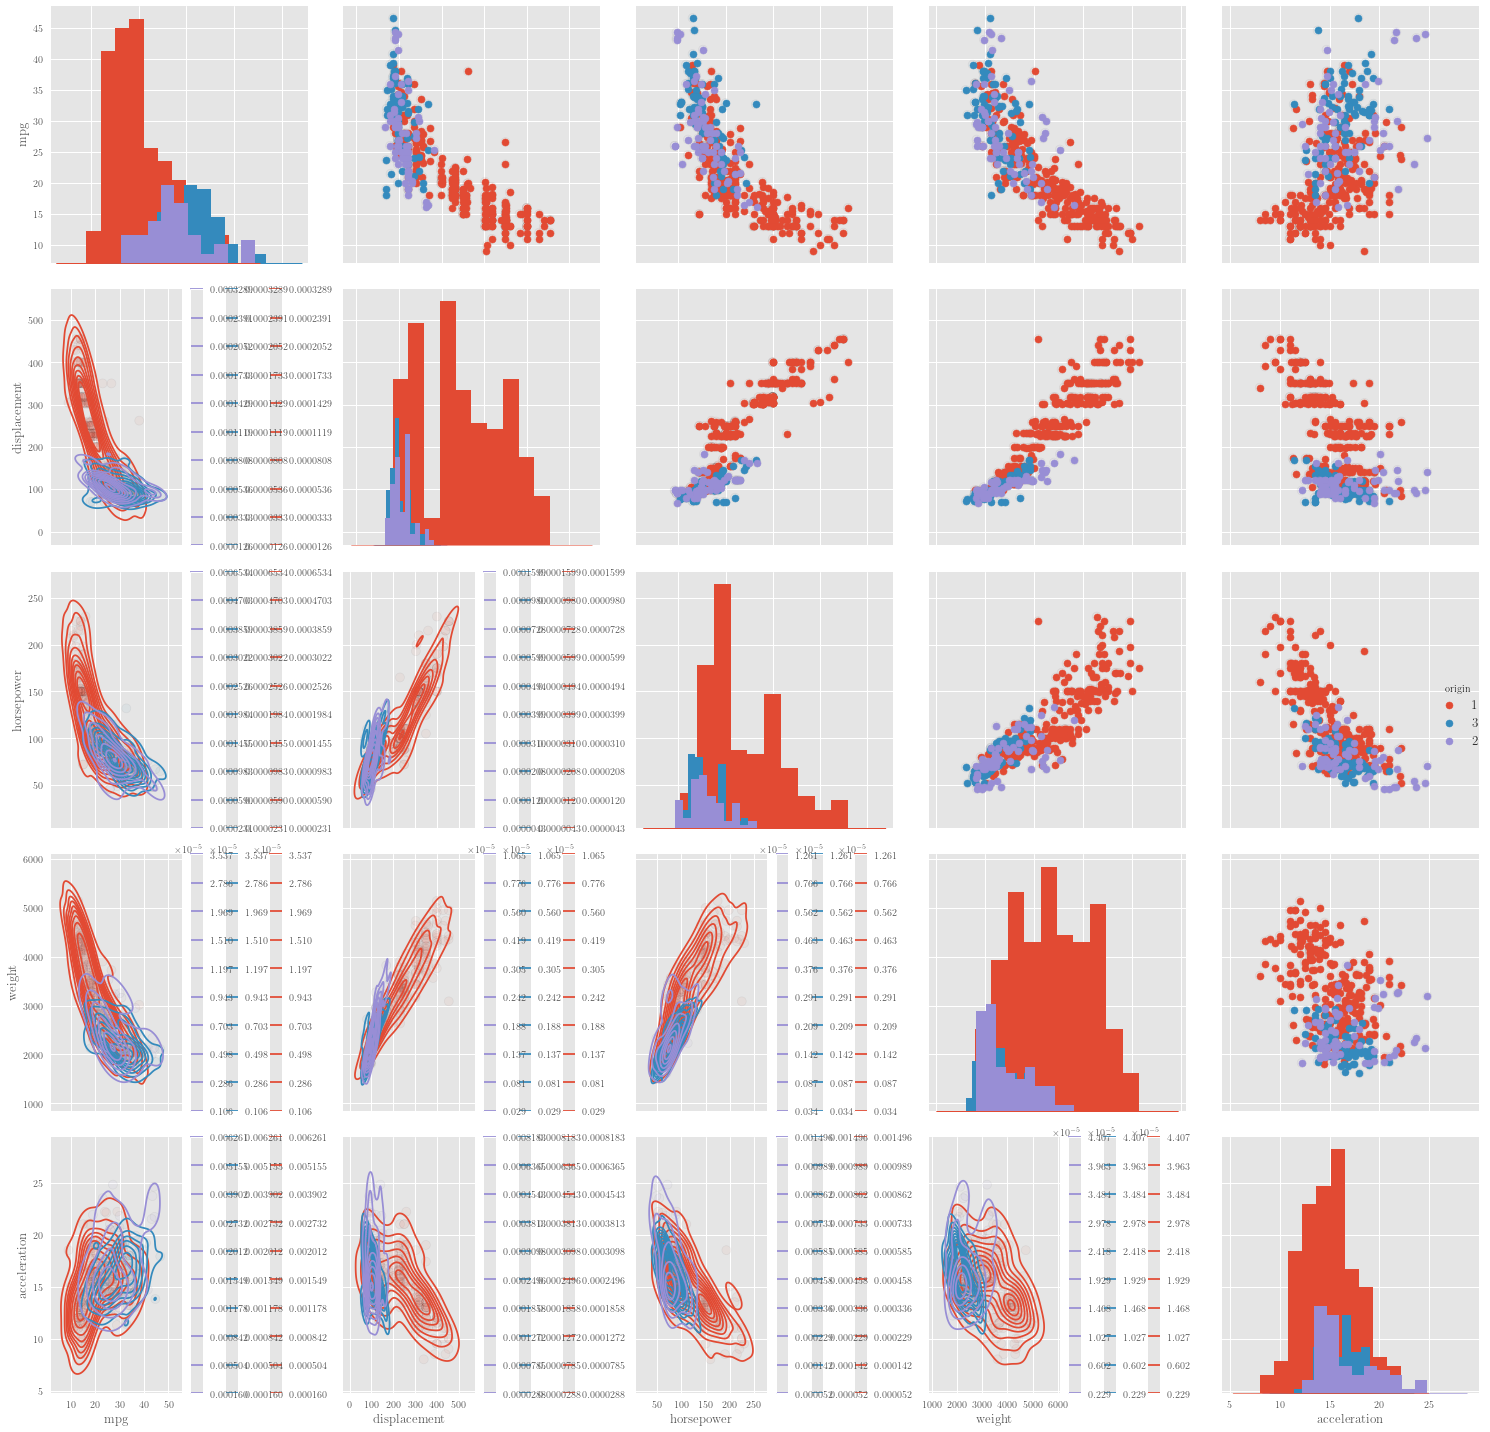

In [28]:

fig = sns.pairplot(numerical_data, 
                   plot_kws = {'alpha': 0.05, 's': 80, 'edgecolor': 'k'}, 
                   hue='origin',
                   size=4);
fig.map_diag(plt.hist);
fig.map_upper(plt.scatter);
fig.map_lower(sns.kdeplot, shade=False, shade_lowest=False, cbar=True,);
plt.tight_layout()
